# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
#import data from csv file
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

    

In [2]:
#load data
data = pd.read_csv('../ml-project-unsupervised-learning/Wholesale_Data.csv')

print(data.head())
print(data.describe())
print(data.info())
print(data.isnull().sum())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.5000

In [3]:
data.rename(columns={'Delicassen':'Deli'}, inplace=True)

data.drop(['Channel', 'Region'], axis=1, inplace=True)


print(data.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Deli
0  12669  9656     7561     214              2674  1338
1   7057  9810     9568    1762              3293  1776
2   6353  8808     7684    2405              3516  7844
3  13265  1196     4221    6404               507  1788
4  22615  5410     7198    3915              1777  5185


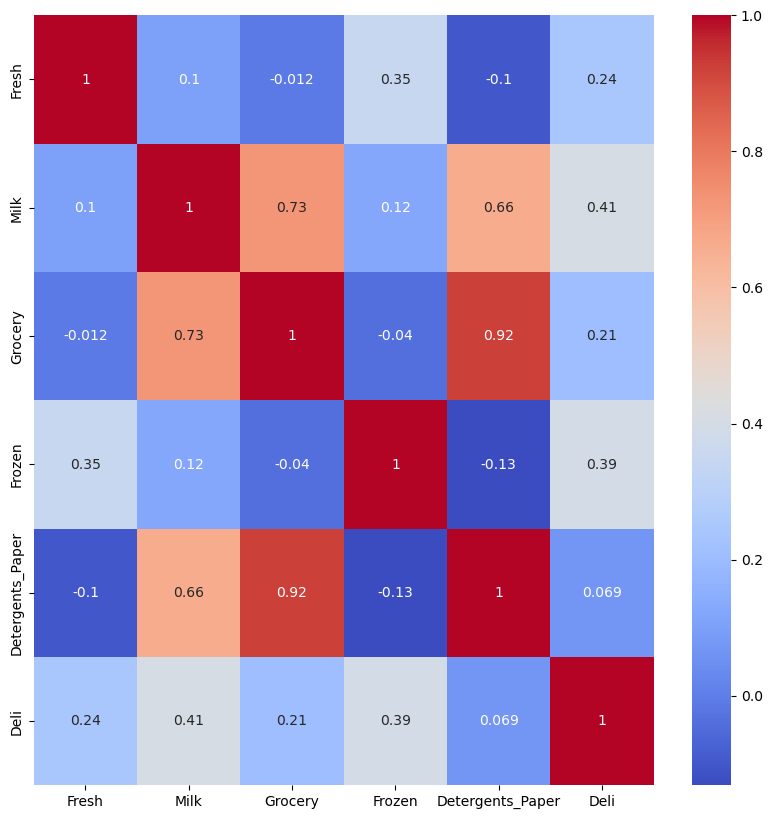

In [4]:
#Check for correlation
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

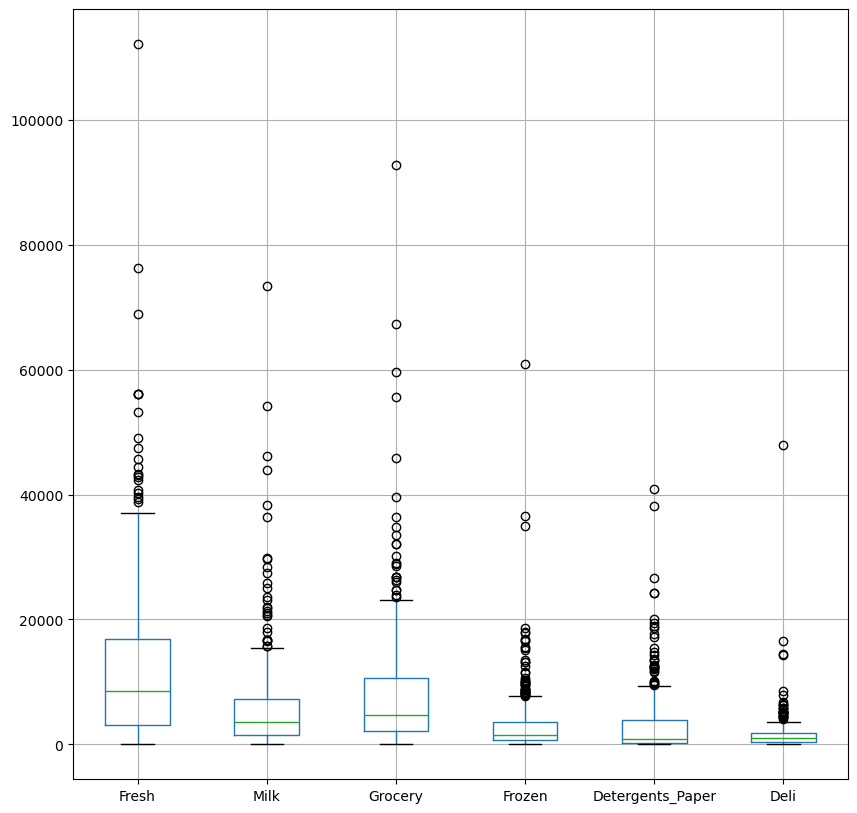

In [5]:
#check for outliers
plt.figure(figsize=(10,10))
data.boxplot()
plt.show()

In [6]:
#remove the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Deli                 1412.00
dtype: float64
(332, 6)


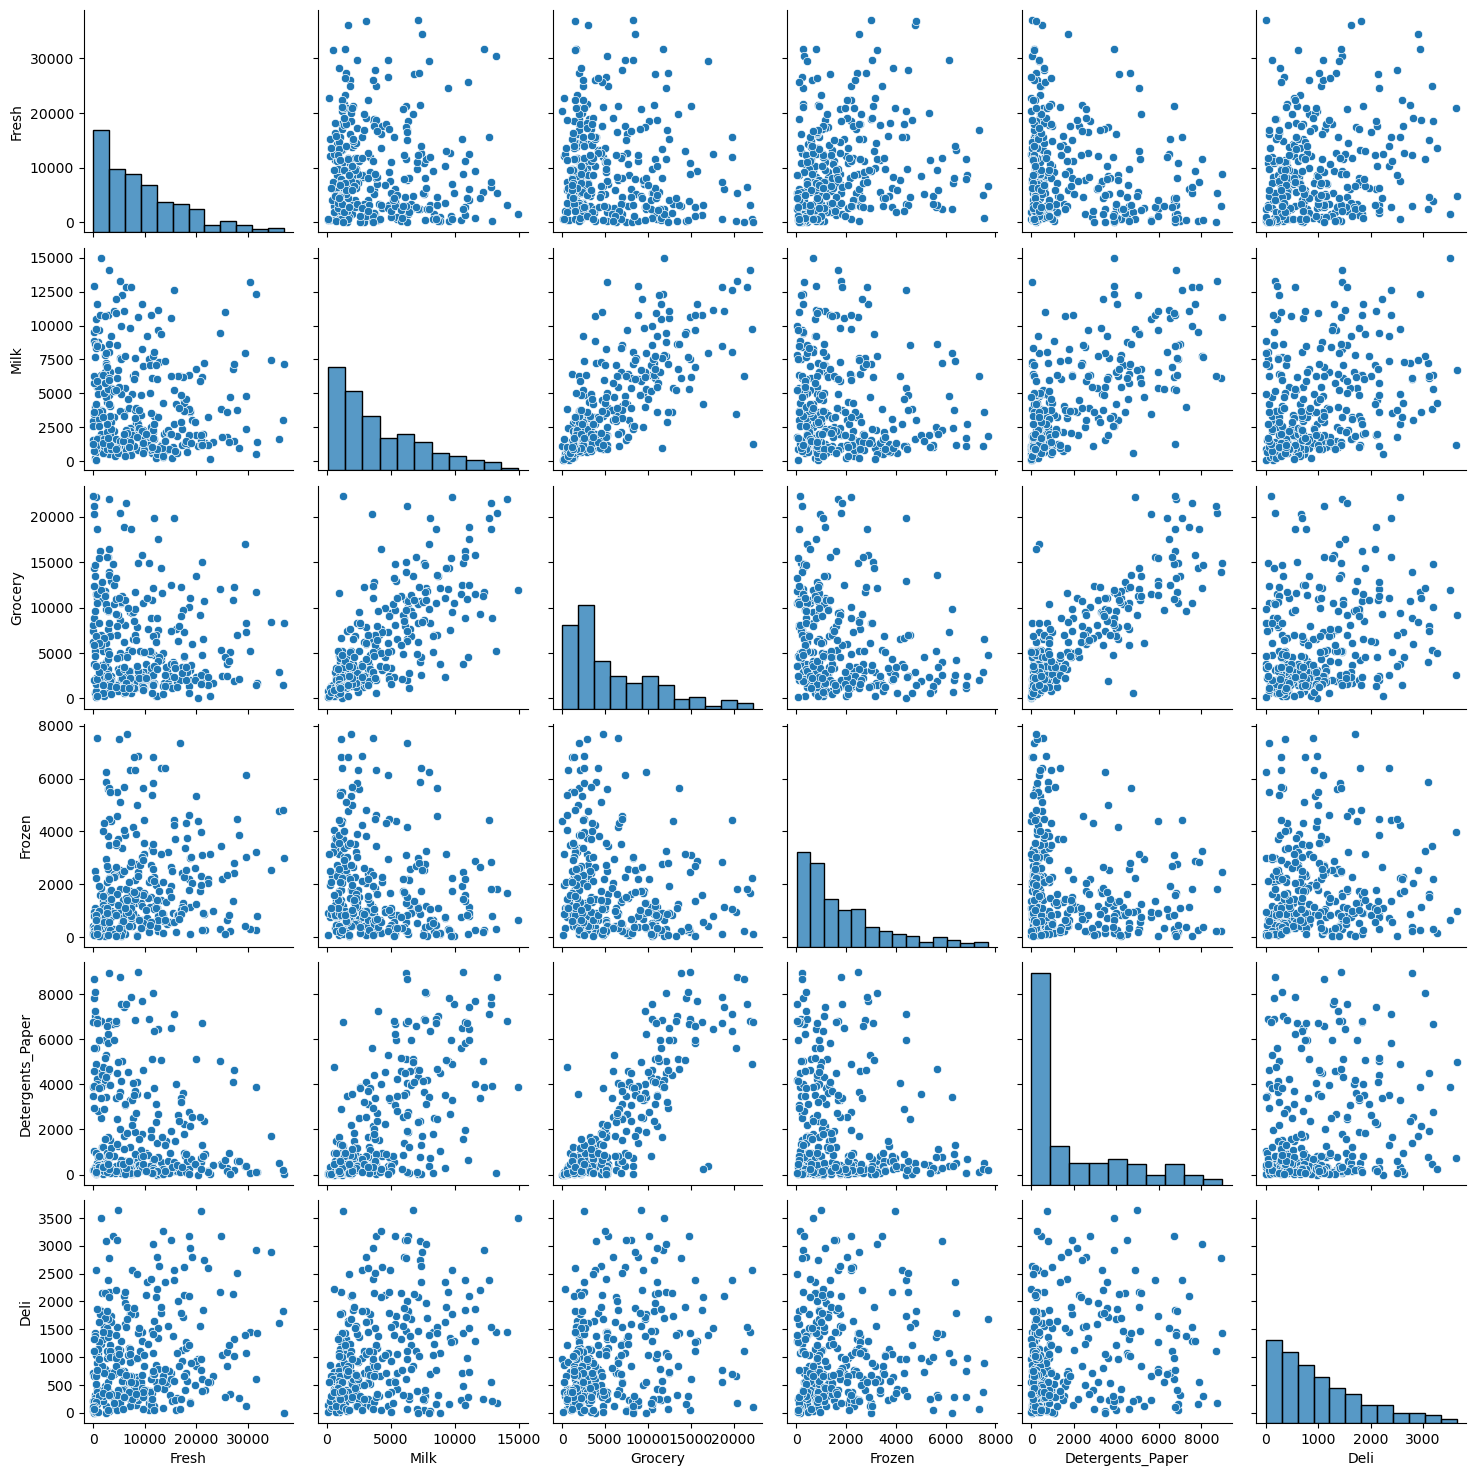

In [7]:
#Show the relationship between the features
sns.pairplot(data)
plt.show()


In [8]:
# Fit the scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)




# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

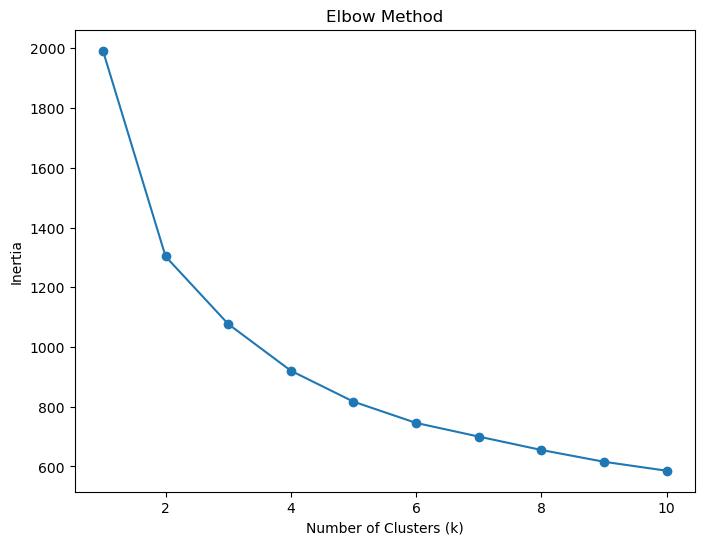

In [9]:
# Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

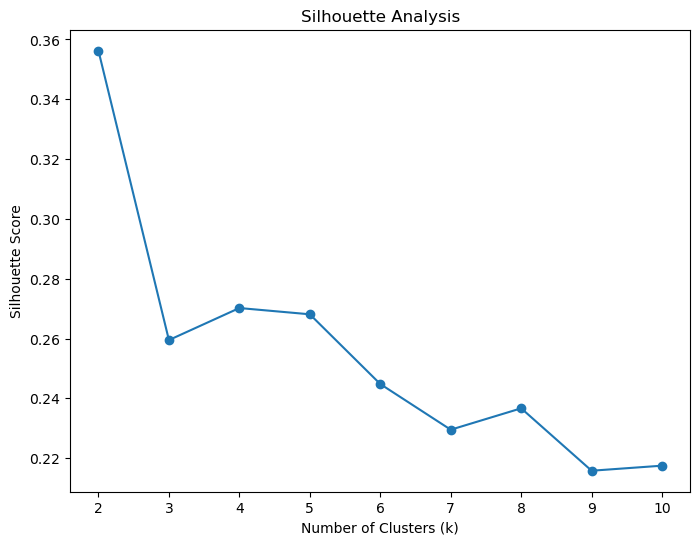

In [10]:
# Silhouette scores for different k values
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2, the average silhouette_score is: 0.356


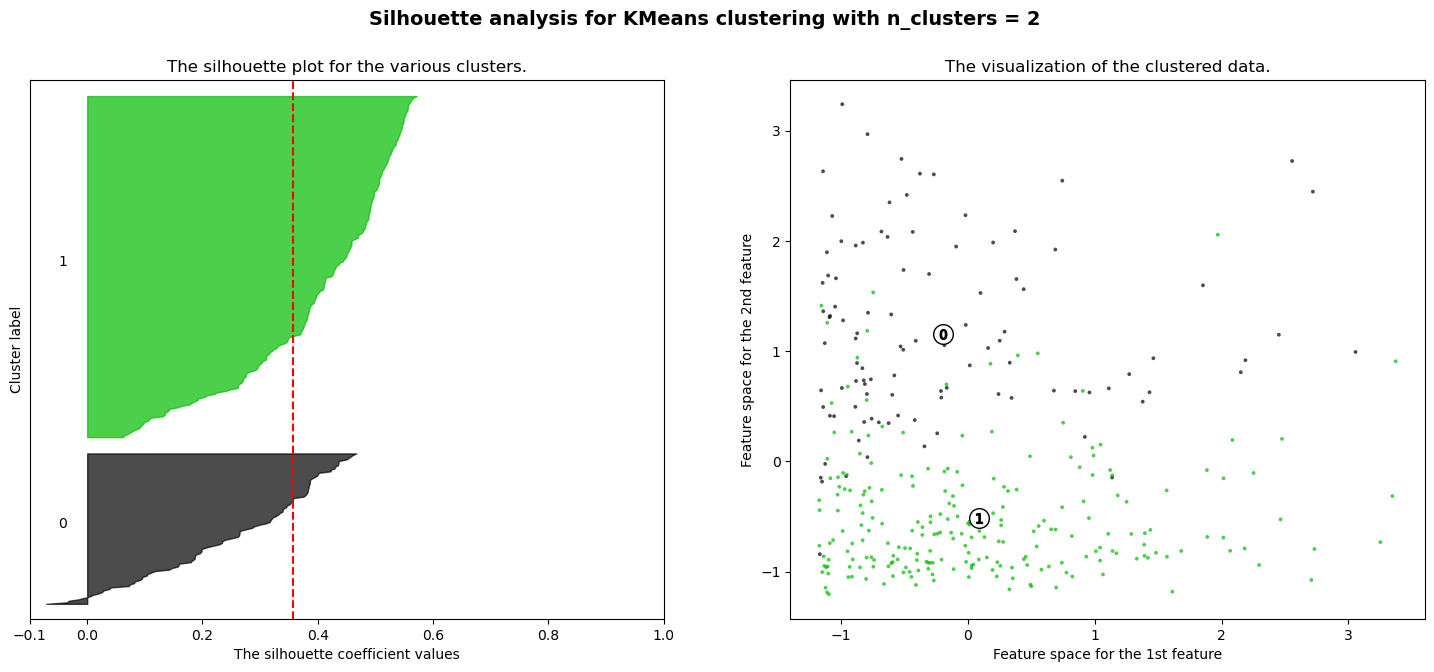

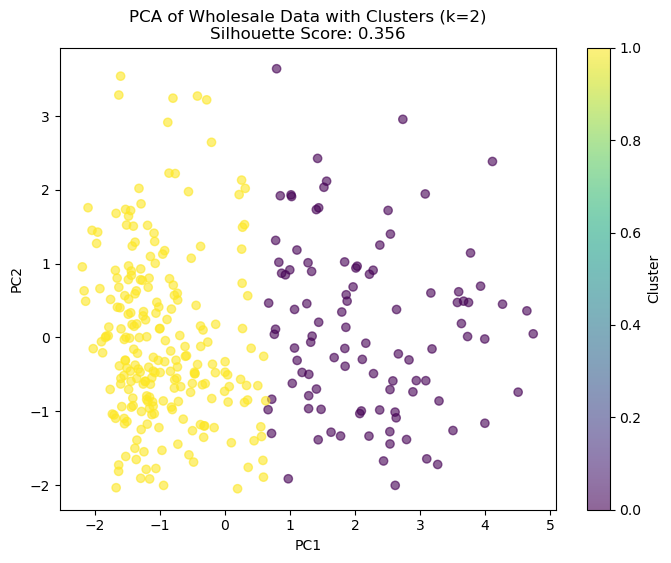

For n_clusters = 3, the average silhouette_score is: 0.259


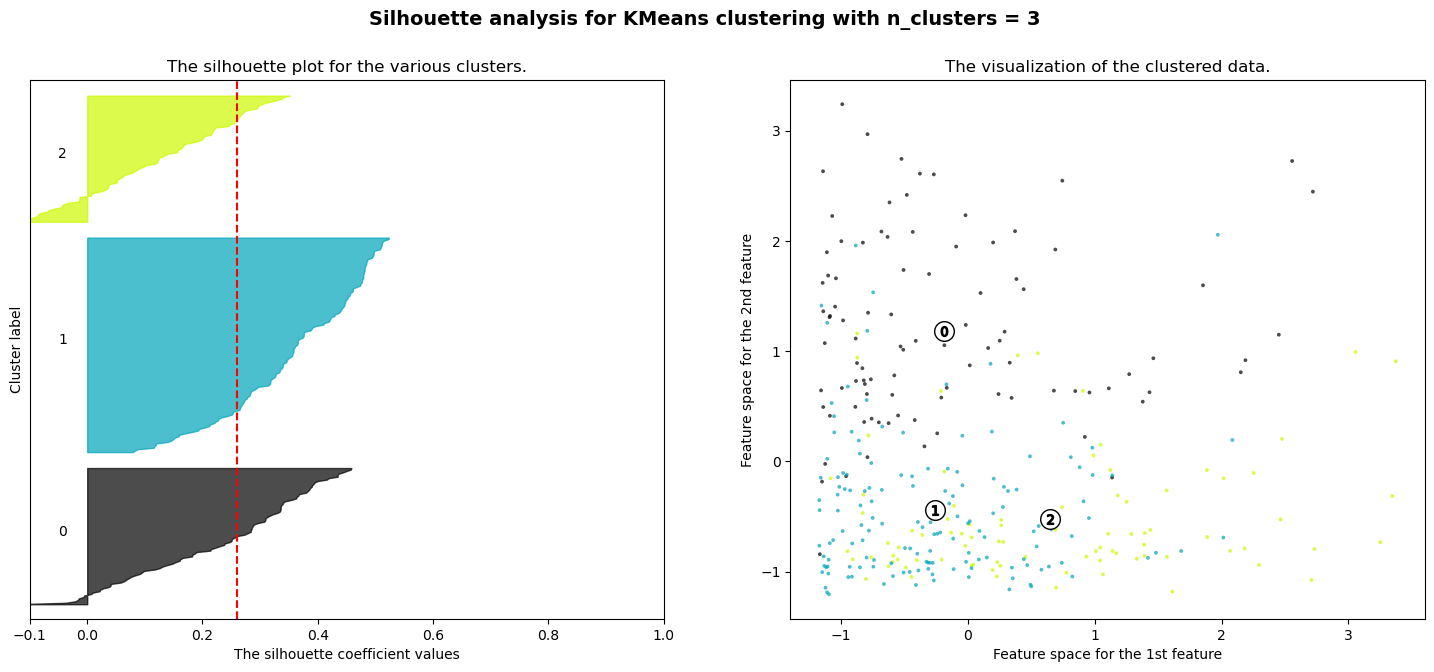

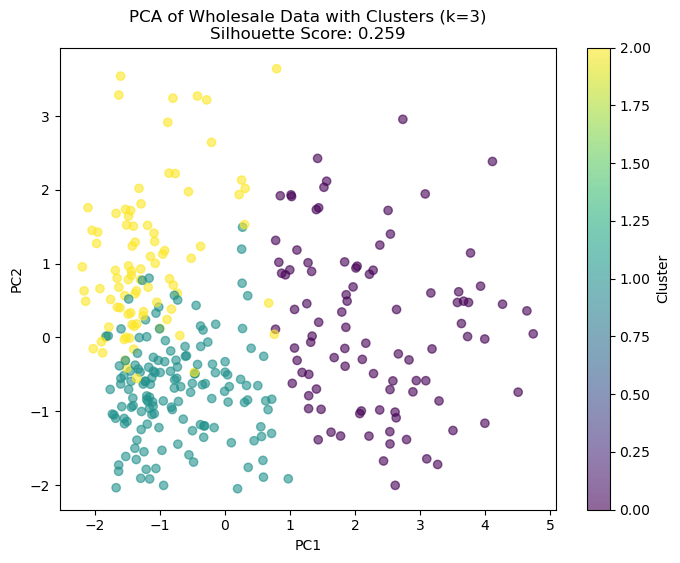

For n_clusters = 4, the average silhouette_score is: 0.270


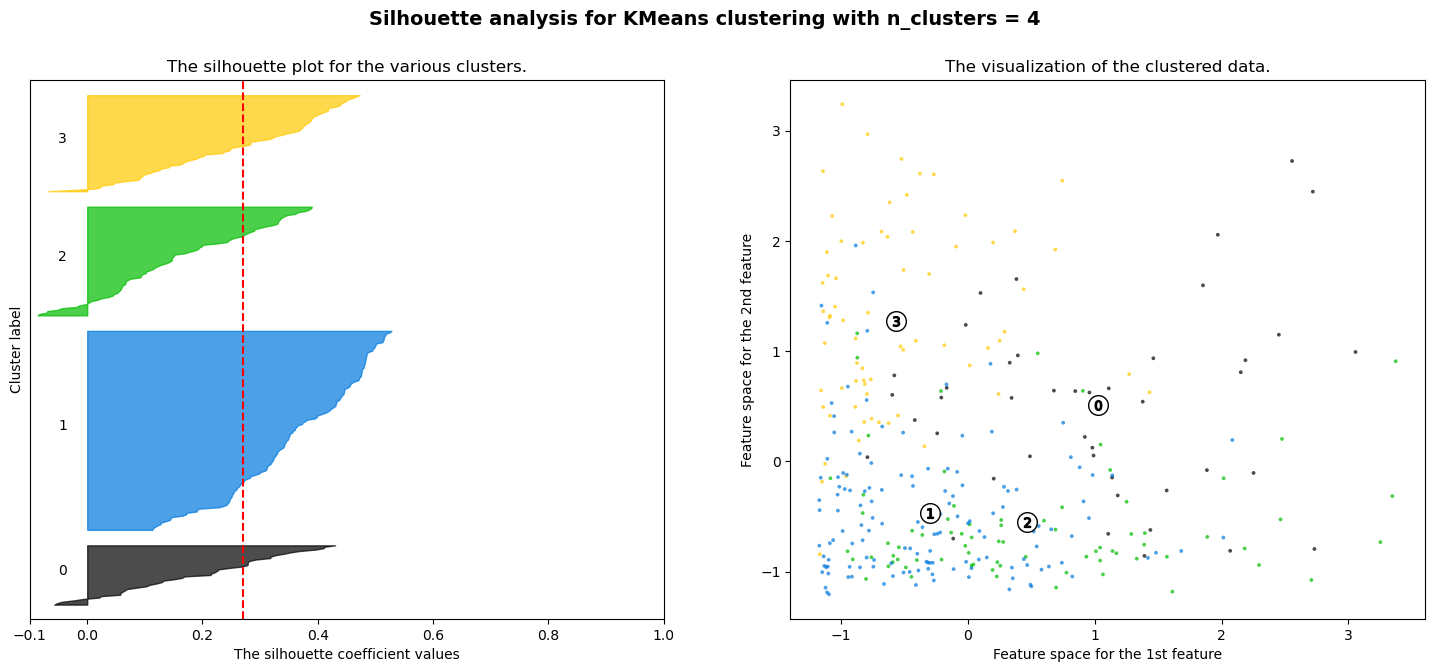

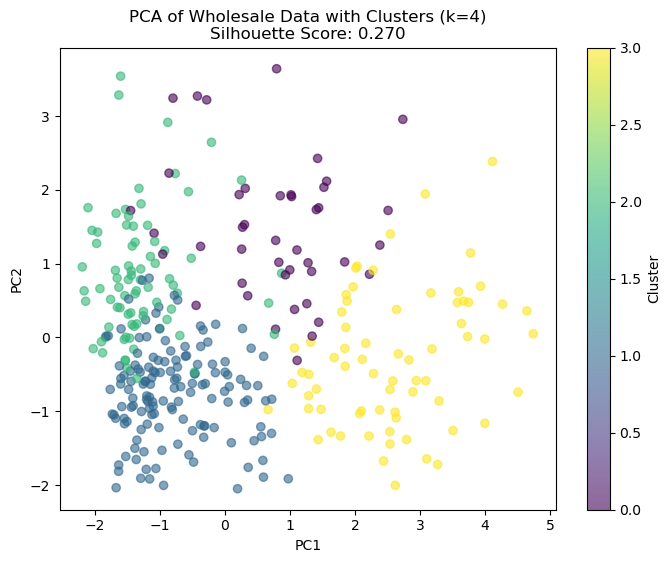

In [11]:
# Use X_train_scaled 
range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Silhouette plot settings
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # KMeans clustering
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # Silhouette scores
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Scatter plot of clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

    # Dimensionality reduction with PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    # PCA scatter plot with clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.colorbar(label='Cluster')
    plt.title(f'PCA of Wholesale Data with Clusters (k={n_clusters})\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

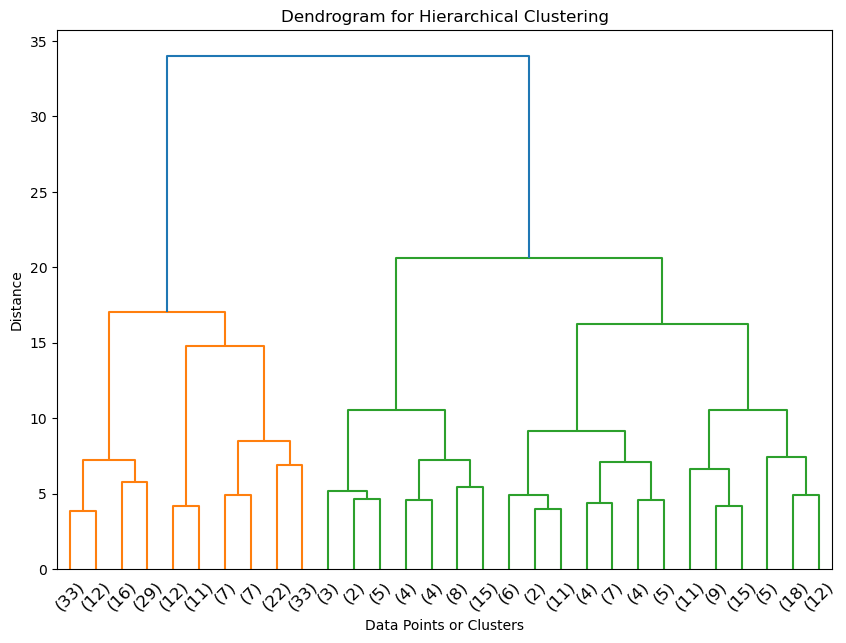

In [12]:
# Hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points or Clusters')
plt.ylabel('Distance')
plt.show()

In [13]:
# Apply Agglomerative Clustering 
n_clusters = 2  
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(data_scaled)

# Add cluster labels to the scaled training data
data_scaled_with_hierarchical = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_with_hierarchical['Cluster'] = hierarchical_labels

In [14]:
silhouette_avg_hierarchical = silhouette_score(data_scaled, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Silhouette Score for Hierarchical Clustering: 0.281


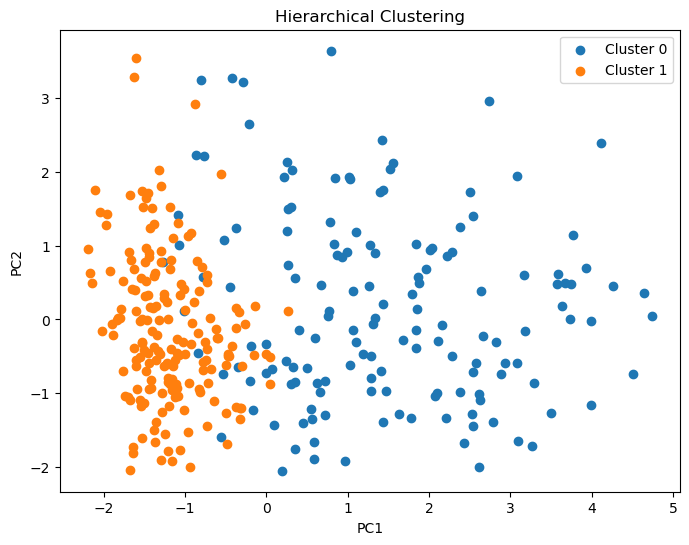

In [17]:
# Visualizing Hierarchical Clustering
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = data_pca[hierarchical_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [15]:
# Get the PCA components (loadings)
loadings = pca.components_

feature_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

feature_contributions = pd.DataFrame(loadings.T, 
                                      columns=['PC1', 'PC2'], 
                                      index=feature_names)

feature_contributions['PC1_Contribution'] = abs(feature_contributions['PC1'])
feature_contributions['PC2_Contribution'] = abs(feature_contributions['PC2'])

top_features_pc1 = feature_contributions.sort_values(by='PC1_Contribution', ascending=False)
top_features_pc2 = feature_contributions.sort_values(by='PC2_Contribution', ascending=False)

# Print the results
print("Top Contributing Features to PC1:")
print(top_features_pc1)

print("\nTop Contributing Features to PC2:")
print(top_features_pc2)

Top Contributing Features to PC1:
                       PC1       PC2  PC1_Contribution  PC2_Contribution
Grocery           0.563505  0.036703          0.563505          0.036703
Detergents_Paper  0.552985 -0.074558          0.552985          0.074558
Milk              0.523058  0.116823          0.523058          0.116823
Delicassen        0.226750  0.580606          0.226750          0.580606
Frozen           -0.185634  0.467923          0.185634          0.467923
Fresh            -0.131166  0.650685          0.131166          0.650685

Top Contributing Features to PC2:
                       PC1       PC2  PC1_Contribution  PC2_Contribution
Fresh            -0.131166  0.650685          0.131166          0.650685
Delicassen        0.226750  0.580606          0.226750          0.580606
Frozen           -0.185634  0.467923          0.185634          0.467923
Milk              0.523058  0.116823          0.523058          0.116823
Detergents_Paper  0.552985 -0.074558          0.552985 

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## Two Main Spending Groups Identified:

Customers are divided into two clusters:
- **Cluster 0**: High spending on **Grocery**, **Milk**, and **Detergents_Paper**.
- **Cluster 1**: High spending on **Fresh**, **Frozen**, and **Deli**.

## Most Important Features:

The features that best explain customer behavior are:
- **Grocery**, **Milk**, and **Detergents_Paper** for packaged goods.
- **Fresh**, **Frozen**, and **Deli** for fresh and specialty products.

## Customer Behavior Patterns:

- **Cluster 0** represents customers who are likely households or bulk buyers focusing on everyday packaged goods.
- **Cluster 1** represents customers like restaurants or specialty retailers focusing on fresh and perishable items.

## Opportunities for Business:

Tailor promotional offers:
- **Cluster 0**: Provide discounts on bundled grocery and household items.
- **Cluster 1**: Promote high-quality fresh product campaigns and premium services.

